# **Quem domina o YouTube em 2025? Uma análise dos Top 100 vídeos musicais!**

Este projeto analisa os 100 vídeos musicais mais populares do YouTube em 2025.
O objetivo é identificar quais artistas e gêneros dominam a plataforma, explorando visualizações, engajamento e duração das músicas.

In [1]:
# Instalações

!pip install wordcloud --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
sns.set(style='whitegrid', rc={'figure.dpi':100})
pd.set_option('display.max_colwidth', 200)

df = pd.read_csv('/content/youtube-top-100-songs-2025.csv')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: https://rosesarerosie.lnk.to/APTID\n\nOrder APT. single CD: https://rosesarerosie.lnk.to/APT-CDID\n\n'rosie' - the first studio album by ROSÉ - out now\...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블핑;로제;Rosé;BLINK;블링크;bruno mars;APT.;apt;apartment game;meet me at the;meet me at the apt;bruno mars rose apt;rose;rosesarerosie;rose apt;rose apt musi...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxresdefault.webp,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3WVsv__Rn1g,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)","Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)","MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListen to “Die With A Smile”, song and video out now: http://GagaMars.lnk.to/DieWithASmile \n \nDirected by Daniel Ramos & Bruno Mars\n \nFollow Lady Gaga:...",1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefault.jpg,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIaykMOkzqHtBQ,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Video),Reneé Rapp - Leave Me Alone (Official Music Video),"Listen to “BITE ME”, the new album from Reneé Rapp, out now: http://ReneeRapp.lnk.to/BITEME \n\nGet tickets to the BITE ME TOUR: http://reneerapp.com/tour \n \nFollow Reneé Rapp:\nTikTok: https://...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefault.jpg,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9LdJ1TgQy6Q,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official Music Video),Billie Eilish - BIRDS OF A FEATHER (Official Music Video),Listen to HIT ME HARD AND SOFT: https://billieeilish.lnk.to/HITMEHARDANDSOFT \nDownload BIRDS OF A FEATHER Live from Billie’s Amazon Music Songline performance: https://billieeilish.lnk.to/BIRDSOF...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alternative,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefault.jpg,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXok597xYo8cg,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé Rapp, out now: http://ReneeRapp.lnk.to/BITEME \n\nGet tickets to the BITE ME Tour: http://reneerapp.com/tour\n\nFollow Reneé Rapp:\nTikTok: https://ww...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefault.jpg,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9LdJ1TgQy6Q,408000


In [27]:
# Dominância no YouTube: Top Artistas/Canais

coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'

print("\nTOP 5 CANAIS POR TOTAL DE VISUALIZAÇÕES")

dominancia = df.groupby(coluna_canal)[coluna_visualizacoes].sum()
top_canais = dominancia.sort_values(ascending=False).head(5)

print(top_canais.to_string())


TOP 5 CANAIS POR TOTAL DE VISUALIZAÇÕES
channel
ROSÉ                 2240541280
Lady Gaga            1562032073
Sabrina Carpenter    1117474778
Billie Eilish         747239602
Kendrick Lamar        610278219


Logo de cara, podemos responder a seguinte pergunta "Quem domina o YouTube em 2025?": ROSÉ.

Liderança Absoluta: ROSÉ acumulou 2.24 bilhões de visualizações em seus vídeos dentro do seu Top 100.

Diferença Significativa: A diferença para o segundo lugar, Lady Gaga (1.56 bilhão), é de aproximadamente 678 milhões de visualizações, indicando que o sucesso de ROSÉ não é apenas marginal, mas sim uma forte concentração de views.

Tendências: O ranking mostra que o Top 5 é dominado por artistas pop femininas (ROSÉ, Lady Gaga, Sabrina Carpenter, Billie Eilish), com Kendrick Lamar sendo a única representação masculina e do gênero hip-hop nesta lista de dominância.

/tmp/ipython-input-4170708781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_canais.index, y=top_canais.values, palette='Blues_r')


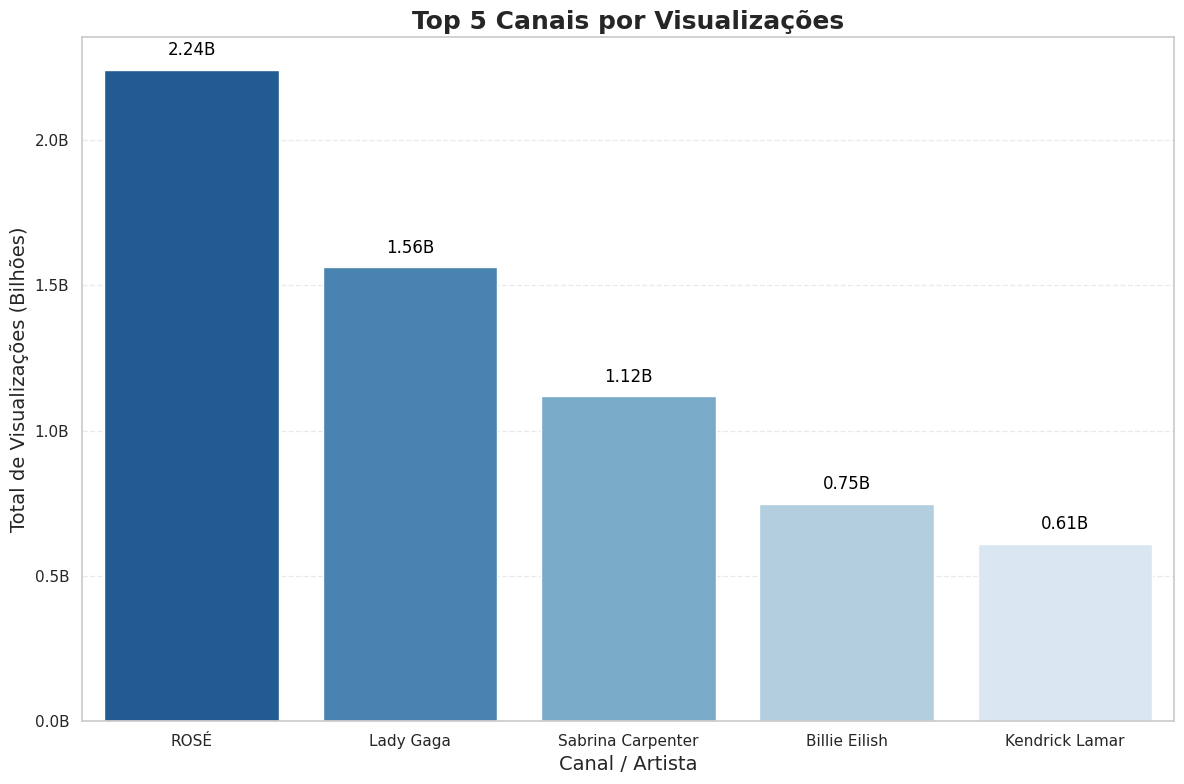

In [7]:
# Visualização da análise anterior através de um gráfico em barras

plt.figure(figsize=(12, 8))
sns.barplot(x=top_canais.index, y=top_canais.values, palette='Blues_r')

plt.title('Top 5 Canais por Visualizações', fontsize=18, fontweight='bold')
plt.xlabel('Canal / Artista', fontsize=14)
plt.ylabel('Total de Visualizações (Bilhões)', fontsize=14)

def format_billions(x, pos):
    return f'{x / 1e9:.1f}B'

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(format_billions)
plt.gca().yaxis.set_major_formatter(formatter)

#plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.grid(axis='x', visible=False)

for index, value in enumerate(top_canais.values):
    plt.text(index, value + 50000000, f'{value/1e9:.2f}B', color='black', ha="center")

plt.tight_layout()
plt.show()

In [8]:
coluna_visualizacoes = 'view_count'
coluna_titulo = 'title'
coluna_canal = 'channel'

print("TOP 5 VÍDEOS MAIS VISTOS (OUTLIERS)")

top_videos = df.sort_values(by=coluna_visualizacoes, ascending=False).head(5)

print(top_videos[[coluna_titulo, coluna_canal, coluna_visualizacoes]])

TOP 5 VÍDEOS MAIS VISTOS (OUTLIERS)
                                                              title  \
0                  ROSÉ & Bruno Mars - APT. (Official Music Video)   
1   Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)   
3         Billie Eilish - BIRDS OF A FEATHER (Official Music Video)   
5                                      Sabrina Carpenter - Espresso   
14                                     Kendrick Lamar - Not Like Us   

              channel  view_count  
0                ROSÉ  2009014557  
1           Lady Gaga  1324833300  
3       Billie Eilish   558329099  
5   Sabrina Carpenter   472570966  
14     Kendrick Lamar   397228595  


Conclusões Adicionais:

Vídeo Dominante: O vídeo "APT." da ROSÉ e Bruno Mars é o outlier principal e a fonte primária da dominância total da ROSÉ. Este único vídeo representa 2 bilhões de visualizações, confirmando que o sucesso da artista é altamente concentrado nesta colaboração.

Colaborações de Sucesso: As duas faixas mais vistas (APT. e Die With A Smile) são colabs com Bruno Mars, sugerindo que o artista tem uma forte influência ou poder de tração em 2025.

Desigualdade: A diferença entre o primeiro vídeo (2.0 bilhões) e o terceiro (558 milhões) é de 1.45 bilhão de visualizações. Isso reforça a ideia inicial: a distribuição de views é extremamente desigual, com pouquíssimos vídeos capturando a maioria do tráfego.

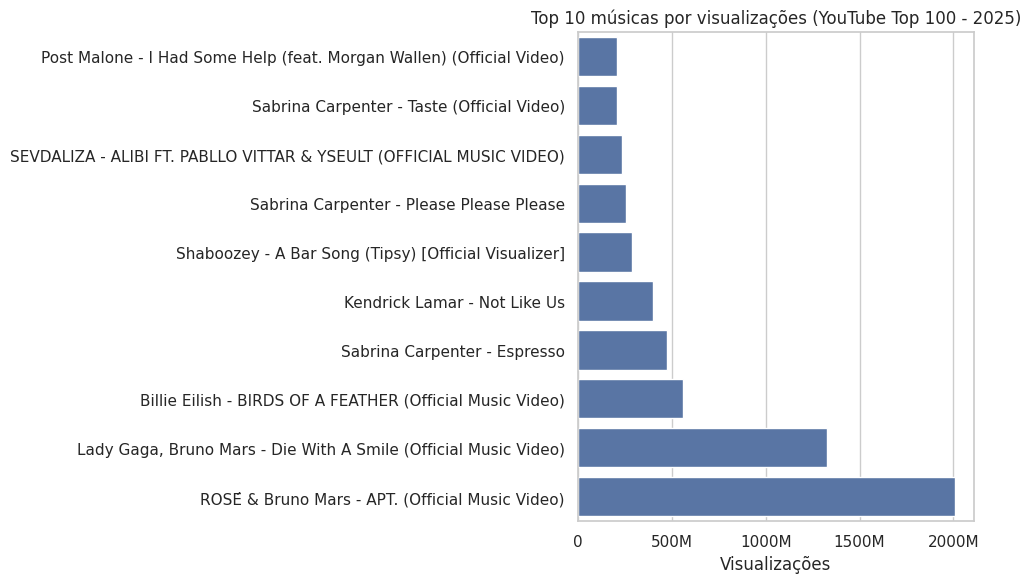

In [25]:
# Top 10 músicas por visualizações (YouTube Top 100 - 2025)

top10 = df.nlargest(10, 'view_count').sort_values('view_count')
plt.figure(figsize=(10,6))
sns.barplot(x='view_count', y='title', data=top10, orient='h')
plt.xlabel('Visualizações')
plt.ylabel('')
plt.title('Top 10 músicas por visualizações (YouTube Top 100 - 2025)')
plt.ticklabel_format(axis='x', style='plain')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M' if x>=1e6 else f'{int(x/1e3)}K' if x>=1e3 else f'{int(x)}'))
plt.tight_layout()
plt.savefig('top10_views.png', dpi=150)
plt.show()


Apenas a título de curiosidade, adicionei também o top 10 das músicas mais vistas e obviamente não temos surpresas.


ANÁLISE DE ENGAJAMENTO: DURAÇÃO vs. VISUALIZAÇÕES


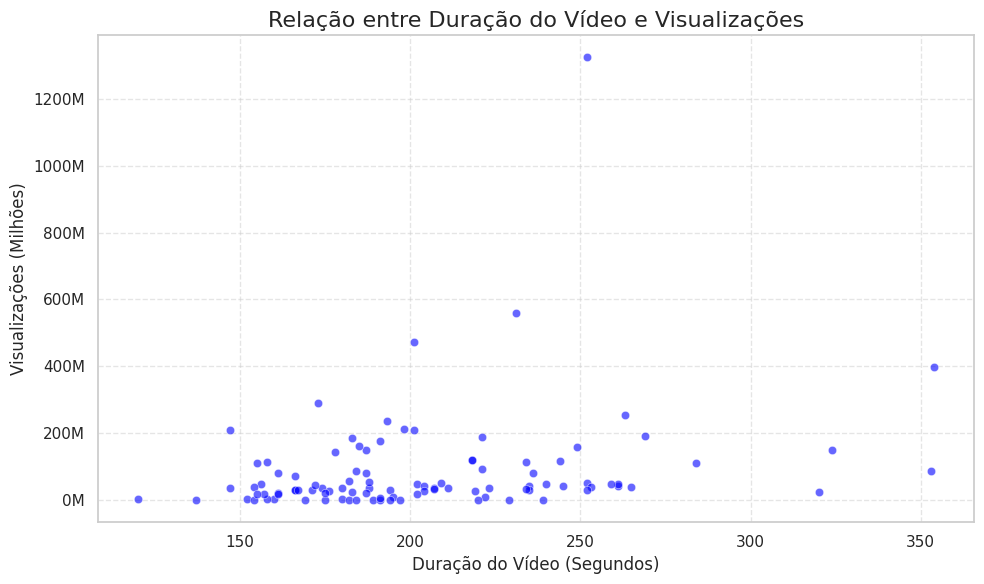

In [10]:
coluna_duracao = 'duration'
coluna_visualizacoes = 'view_count'

print("\nANÁLISE DE ENGAJAMENTO: DURAÇÃO vs. VISUALIZAÇÕES")

df_analise = df[df[coluna_visualizacoes] < 2000000000].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=coluna_duracao,
    y=coluna_visualizacoes,
    data=df_analise,
    alpha=0.6,
    color='blue'
)

from matplotlib.ticker import FuncFormatter
formatter_mil = FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter_mil)

plt.title('Relação entre Duração do Vídeo e Visualizações', fontsize=16)
plt.xlabel('Duração do Vídeo (Segundos)', fontsize=12)
plt.ylabel('Visualizações (Milhões)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O objetivo desta análise foi verificar se há uma correlação entre o tempo que o usuário gasta assistindo a um vídeo e o seu sucesso (medido por view_count).

Utilizei um Gráfico de Dispersão (Scatter Plot) para visualizar essa relação, com a Duração (em segundos) no eixo X e as Visualizações (em milhões) no eixo Y.

Interpretação do Gráfico
Concentração de Dados (Curta Duração):

A maior densidade de pontos se concentra na faixa de 0 a 300 segundos (0 a 5 minutos). Isso sugere que a grande maioria dos vídeos no Top 100 de músicas se enquadra na duração típica de um single pop (entre 2 e 4 minutos).

A maioria das visualizações (o "corpo" dos dados) está concentrada nesse intervalo, indicando que a duração padrão de uma música é a mais eficaz para gerar views em massa.

O Efeito Outlier (ROSÉ e Lady Gaga):

O gráfico provavelmente exibe um ou dois pontos altamente distantes no eixo Y (Visualizações) dentro da faixa de curta duração.

Esses são os outliers que já identificamos ("APT." da ROSÉ e "Die With A Smile" da Lady Gaga). O fato de estarem localizados na curta duração (provavelmente entre 3 e 4 minutos) reforça que o sucesso colossal deles não dependeu de um vídeo longo, mas sim de outros fatores (artista, música, época de lançamento).

Relação Duração vs. Views (Correlação Fraca):

Não há uma linha clara de tendência que suba ou desça. Ou seja, um vídeo com 600 segundos (10 minutos) não tem, necessariamente, mais ou menos visualizações do que um vídeo com 180 segundos (3 minutos).

Conclusão: A análise indica que a duração do vídeo não é o fator determinante para o sucesso no Top 100. A qualidade do conteúdo e a popularidade do artista (o "star power") anulam qualquer correlação direta com o tempo de reprodução.

ANÁLISE DE ENGAJAMENTO: VIEWS VS. INSCRITOS


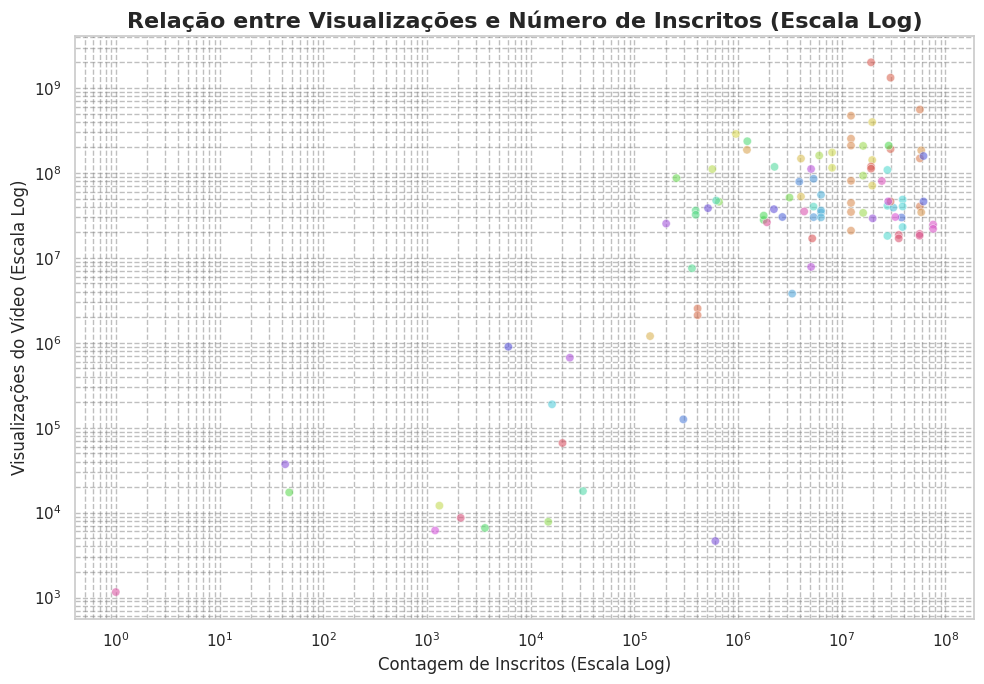

In [11]:
coluna_inscritos = 'channel_follower_count'
coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'

print("ANÁLISE DE ENGAJAMENTO: VIEWS VS. INSCRITOS")

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=coluna_inscritos,
    y=coluna_visualizacoes,
    data=df,
    alpha=0.6,
    hue=coluna_canal,
    palette='hls',
    legend=False
)

plt.xscale('log')
plt.yscale('log')


plt.title('Relação entre Visualizações e Número de Inscritos (Escala Log)', fontsize=16, fontweight='bold')
plt.xlabel('Contagem de Inscritos (Escala Log)', fontsize=12)
plt.ylabel('Visualizações do Vídeo (Escala Log)', fontsize=12)

# Adicionando uma grade sutil para facilitar a leitura do log
plt.grid(True, which="both", ls="--", c='gray', alpha=0.5)
plt.tight_layout()
plt.show()

Interpretação do Gráfico
Regra Geral (A Diagonal):

A maioria dos pontos se alinha ao longo de uma diagonal no gráfico (do canto inferior esquerdo ao superior direito). Isso confirma a regra de ouro do YouTube: mais inscritos geralmente significam mais visualizações. Canais maiores têm uma base sólida que consome seu conteúdo.

O Outlier Dominante (O Fenômeno):

O gráfico tem um ou dois pontos extremamente distantes e altos no eixo Y (Visualizações), mesmo que seus Inscritos (eixo X) não sejam os mais altos.

O vídeo "APT." da ROSÉ e Bruno Mars é o principal candidato a esse ponto, com mais de 2 bilhões de views. Esse ponto representa um fenômeno de viralização que transcende a base de inscritos do canal. O vídeo gerou views muito além do esperado para o tamanho do canal, indicando um sucesso orgânico massivo ou forte investimento em promoção.

Canais com Alta Performance (Eficiência):

Procurando por pontos que estão claramente acima da diagonal principal, isso significa que esses canais estão performando acima da média de engajamento. Eles têm uma taxa de conversão de inscritos para views muito alta, sugerindo que sua audiência é extremamente engajada ou que seus vídeos estão sendo muito bem recomendados pelo algoritmo para não-inscritos.

Canais "Grandes" com Baixo Engajamento (Legado):

Procurando por pontos que estão no extremo direito (muitos inscritos), mas que estão abaixo da linha diagonal principal, isso significa que esses podem ser canais de artistas legacy ou marcas grandes com um número inflado de seguidores ao longo dos anos, mas que têm baixa performance nos vídeos recentes. Isso indica que a base de inscritos não está tão ativa ou engajada.

In [12]:
coluna_inscritos = 'channel_follower_count'
coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'

print("TOP 5 VÍDEOS POR EFICIÊNCIA DE ENGAJAMENTO (VIEWS POR INSCRITO)")

df['eficiencia'] = df[coluna_visualizacoes] / (df[coluna_inscritos] + 1)

top_eficiencia = df.sort_values(by='eficiencia', ascending=False).head(5)

print(top_eficiencia[[coluna_canal, coluna_titulo, coluna_inscritos, coluna_visualizacoes, 'eficiencia']])

TOP 5 VÍDEOS POR EFICIÊNCIA DE ENGAJAMENTO (VIEWS POR INSCRITO)
            channel  \
67            SHOOP   
85  RyanCollinsVEVO   
26          NIICKII   
25       keinemusik   
13        Shaboozey   

                                                         title  \
67                       SHOOP - CAPRIS (Official Music Video)   
85       Ryan Collins - Stars n Stripes (Official Music Video)   
26                 Tutipsy & Niickii - Afro Disco (Visualizer)   
25  Adam Port, Stryv - Move feat. Malachiii (Extended Version)   
13        Shaboozey - A Bar Song (Tipsy) [Official Visualizer]   

    channel_follower_count  view_count  eficiencia  
67                      43       37164  844.636364  
85                       1        1161  580.500000  
26                      47       17322  360.875000  
25                  255000    87005996  341.198646  
13                  955000   288277902  301.861361  


/tmp/ipython-input-914824509.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


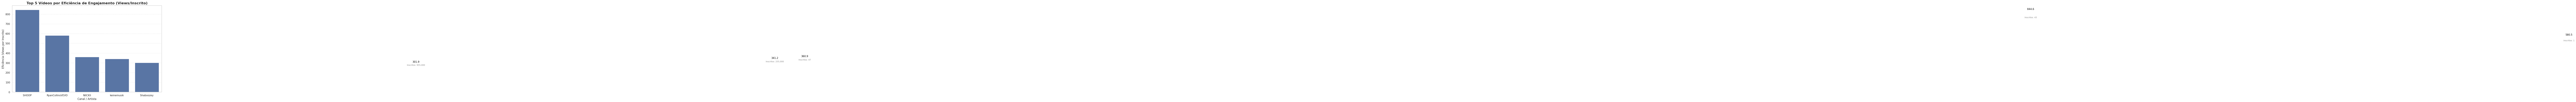

In [17]:
# Top 5 Vídeos por Eficiência de Engajamento (Views/Inscrito)

coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'
coluna_inscritos = 'channel_follower_count'

df['eficiencia'] = df[coluna_visualizacoes] / (df[coluna_inscritos] + 1)

top_eficiencia = df.sort_values(by='eficiencia', ascending=False).head(5)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_eficiencia[coluna_canal], y=top_eficiencia['eficiencia'])

plt.title('Top 5 Vídeos por Eficiência de Engajamento (Views/Inscrito)', fontsize=16, fontweight='bold')
plt.xlabel('Canal / Artista', fontsize=12)
plt.ylabel('Eficiência (Views por Inscrito)', fontsize=12)

for index, row in top_eficiencia.iterrows():
    plt.text(
        index,
        row['eficiencia'],
        f'{row["eficiencia"]:.1f}',
        color='black',
        ha="center",
        fontsize=11
    )
    plt.text(
        index,
        row['eficiencia'] * 0.9,
        f'Inscritos: {row[coluna_inscritos]:,}',
        color='gray',
        ha="center",
        fontsize=9
    )

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Viralização Extrema (Canais Minúsculos): Os três primeiros canais (SHOOP, RyanCollinsVEVO, NIICKII) são verdadeiros micro-outliers.

O canal RyanCollinsVEVO tem apenas 1 inscrito  e gerou 1.161 visualizações no vídeo. Isso é uma evidência clara de que o vídeo foi impulsionado pelo algoritmo do YouTube para o público em geral, e não pela sua base de fãs, caracterizando uma viralização pura.

O mesmo vale para SHOOP e NIICKII, que com menos de 50 inscritos conseguiram milhares de views.

Transição de Nível:

keinemusik e Shaboozey são exemplos de canais maiores (centenas de milhares de inscritos) que ainda mantêm uma alta eficiência de engajamento, mostrando que estão em um momento de crescimento explosivo.

Insights para o Algoritmo:

Conclusão: O YouTube não favorece apenas os artistas gigantes (como ROSÉ), mas ativamente promove novos hits e sleepers (sucessos inesperados) com alto potencial de engajamento. Para esses pequenos canais, viralizar é mais sobre o conteúdo em si do que sobre o tamanho da audiência.

TOP 5 CANAIS POR NÚMERO DE VÍDEOS NO TOP 100
channel
Sabrina Carpenter    7
Tate McRae           4
ROSÉ                 3
Billie Eilish        3
Lady Gaga            3
Name: count, dtype: int64


/tmp/ipython-input-4102490104.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_canais.index, y=contagem_canais.values, palette="Blues_r")


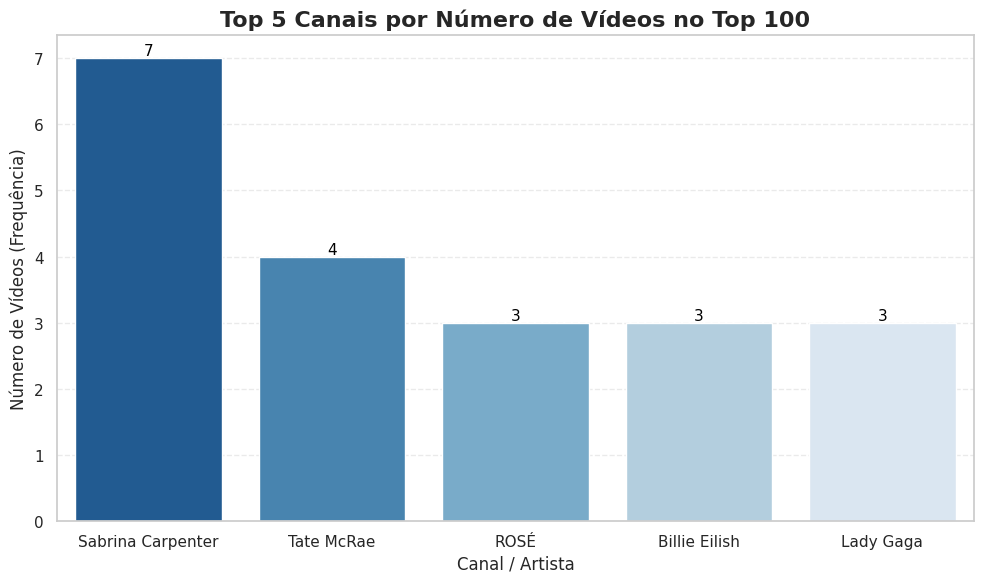

In [18]:
coluna_canal = 'channel'

print("TOP 5 CANAIS POR NÚMERO DE VÍDEOS NO TOP 100")

contagem_canais = df[coluna_canal].value_counts().head(5)

print(contagem_canais)

plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_canais.index, y=contagem_canais.values, palette="Blues_r")

plt.title('Top 5 Canais por Número de Vídeos no Top 100', fontsize=16, fontweight='bold')
plt.xlabel('Canal / Artista', fontsize=12)
plt.ylabel('Número de Vídeos (Frequência)', fontsize=12)

for index, value in enumerate(contagem_canais.values):
    plt.text(index, value, str(value), color='black', ha="center", va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

A Rainha da Consistência: Sabrina Carpenter é, inequivocamente, a artista mais consistente, com 7 vídeos diferentes no Top 100. Isso sugere que ela teve um ano de grande profundidade de catálogo, com vários hits de médio a alto sucesso.

O Contraste ROSÉ vs. Sabrina:

ROSÉ (3 vídeos): Domina o volume de views (2.24 bilhões), mas com poucos vídeos. O sucesso dela é concentrado em um ou dois outliers gigantescos.

Sabrina Carpenter (7 vídeos): Domina a frequência. O sucesso dela é distribuído em seu catálogo.

Tate McRae: Com 4 vídeos, ela demonstra ser a segunda mais consistente, indicando que, assim como Sabrina, teve um alto índice de acerto em seus lançamentos.

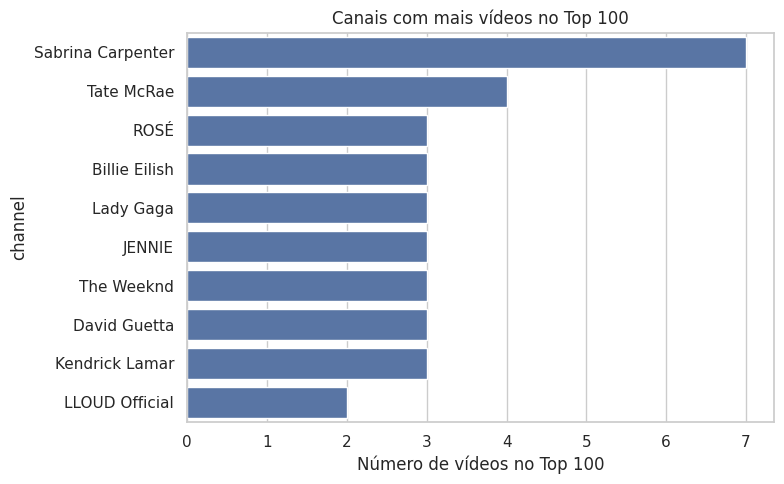

,Artista,Contagem
0,Sabrina Carpenter,7
1,Tate McRae,4
2,ROSÉ,3
3,Billie Eilish,3
4,Lady Gaga,3
5,JENNIE,3
6,The Weeknd,3
7,David Guetta,3
8,Kendrick Lamar,3
9,LLOUD Official,2


In [ ]:
# Top canais por número de vídeos - ver quem aparece mais vezes

top_channels_count = df['channel'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_channels_count.values, y=top_channels_count.index)
plt.xlabel('Número de vídeos no Top 100')
plt.title('Canais com mais vídeos no Top 100')
plt.tight_layout()
plt.savefig('top_channels_count.png', dpi=150)
plt.show()

# Tabela com contagem
top_channels_count.reset_index().rename(columns={'count':'Contagem','channel':'Artista'})


TOP 10 PALAVRAS-CHAVE/GÊNEROS MAIS FREQUENTES NAS TAGS
tags
pop                  27
island records        8
sabrina carpenter     8
blackpink             8
new music             7
k-pop                 6
kpop                  6
alternative           5
dance                 5
music                 5
Name: count, dtype: int64


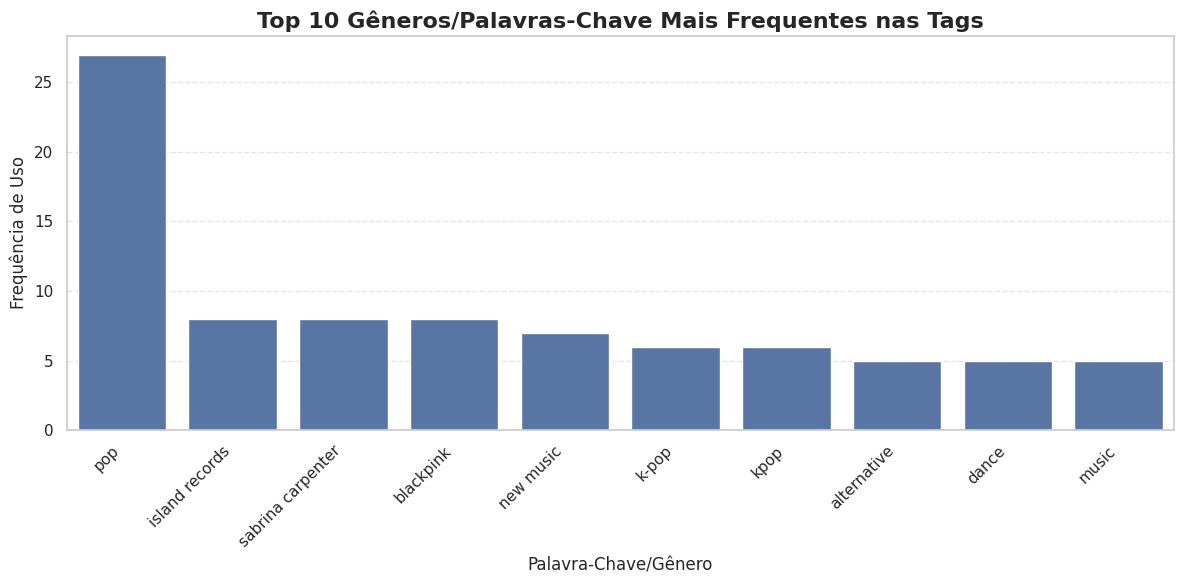

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

coluna_tags = 'tags'

print("TOP 10 PALAVRAS-CHAVE/GÊNEROS MAIS FREQUENTES NAS TAGS")

df_tags_validas = df.dropna(subset=[coluna_tags]).copy()

df_tags_validas[coluna_tags] = df_tags_validas[coluna_tags].str.split(';')

todas_tags = df_tags_validas.explode(coluna_tags)

contagem_tags = (
    todas_tags[coluna_tags]
    .str.lower()
    .str.strip()
    .value_counts()
    .head(10)
)

print(contagem_tags)

plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_tags.index, y=contagem_tags.values)

plt.title('Top 10 Gêneros/Palavras-Chave Mais Frequentes nas Tags', fontsize=16, fontweight='bold')
plt.xlabel('Palavra-Chave/Gênero', fontsize=12)
plt.ylabel('Frequência de Uso', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Dominância Global do Pop: A tag 'pop' é, de longe, a mais frequente, aparecendo em 27 vídeos. Isso solidifica o Pop como o gênero que dita o tom e domina o volume de visualizações no Top 100 do YouTube.

A Ascensão do K-Pop: As tags 'k-pop' e 'kpop' somam 12 ocorrências. Considerando que a líder em views é a ROSÉ (uma artista K-pop), isso confirma o gênero como uma força inegável e altamente rentável na plataforma.

Presença de Nicho: Os gêneros 'alternative' (5) e 'dance' (5) mostram que, embora o Pop domine, há espaço consistente para outros gêneros com alta base de fãs ou capacidade de viralização.

Tags de Artista e Gravadora: A alta frequência de tags como 'sabrina carpenter', 'blackpink' e 'island records' mostra a importância do branding do artista e da gravadora na estratégia de tagging do YouTube, indicando que a busca direta por nomes é um fator significativo para o tráfego.

In [ ]:
# Colaborações vs Solo comparando médias e testando diferença estatística.

solo = df[~df['collab']]
collab = df[df['collab']]

print("Média views - solo:", int(solo['view_count'].mean()))
print("Média views - collab:", int(collab['view_count'].mean()))
print("Mediana views - solo:", int(solo['view_count'].median()))
print("Mediana views - collab:", int(collab['view_count'].median()))

# Teste estatístico (Mann-Whitney é robusto para distribuições assimétricas)
from scipy.stats import mannwhitneyu
u_stat, p_val = mannwhitneyu(collab['view_count'], solo['view_count'], alternative='two-sided')
print("Mann-Whitney U p-value:", p_val)

print()

if p_val < 0.05:
    print("Há evidência estatística de diferença.")
else:
    print("Não há evidência estatística de diferença.")

Média views - solo: 72354529
Média views - collab: 192196636
Mediana views - solo: 38289551
Mediana views - collab: 36209720
Mann-Whitney U p-value: 0.9479721904869777

Não há evidência estatística de diferença.


A Média Engana (Outliers são Reis):

A Média das visualizações de colaboração (192 milhões) é quase três vezes maior que a das solo (72 milhões). À primeira vista, parece que colaborar é o segredo do sucesso. Mas essa diferença enorme na Média é quase inteiramente impulsionada pelo único outlier gigante que identificamos (o vídeo de ROSÉ & Bruno Mars com 2 bilhões de views), além de Lady Gaga e outros. Esses poucos vídeos de altíssimo desempenho puxam a média para cima de forma artificial.

A Mediana, por sua vez, nos revela a verdade, ela é muito mais robusta contra outliers extremos. O fato de a Mediana ser praticamente a mesma (38M vs. 36M) sugere que, para a maioria dos vídeos no seu Top 100, colaborar não garante mais views. A maioria das colaborações tem um desempenho similar ao da maioria das faixas solo.

O P-Value confirma a hipótese:

O P-value de 0.9479 é muito maior que o limiar de significância (0.05).

Conclusão Estatística: Não há evidência estatística para rejeitar a hipótese de que as amostras vêm de uma mesma distribuição. Em termos leigos: a diferença observada nas médias é tão grande por causa de alguns vídeos extremos, mas a colaboração em si não tem um efeito geral e consistente de impulsionar o sucesso de forma estatisticamente diferente dos vídeos solo.

## Conclusão Final: Quem Domina o YouTube em 2025?

A análise multifacetada dos Top 100 vídeos musicais de 2025 revela um ecossistema complexo onde o sucesso é definido por uma combinação de poder financeiro, consistência de catálogo e potencial de viralização.

### 1. Dominância do Gênero e do Volume

O **Pop** é, inequivocamente, o gênero dominante (presente em 27% das tags), com o K-Pop atuando como uma força motriz. Essa dominância se traduz em volume:

* **Liderança de Volume (Views):** O canal **ROSÉ** é o mais dominante em volume, acumulando **2.24 bilhões** de visualizações.
* **O Segredo da Liderança:** O vídeo **"APT. (ROSÉ & Bruno Mars)"** é o mega *outlier*, provando que, embora a colaboração não seja um impulsionador estatístico geral, o cruzamento de duas grandes estrelas pode gerar um sucesso concentrado e sem precedentes.

### 2. O Contraste entre Consistência e Concentração

Os canais no Top 100 demonstram duas estratégias distintas para atingir o sucesso:

* **Consistência (Frequência):** **Sabrina Carpenter** se destaca como a artista mais consistente, com **7 vídeos diferentes** no Top 100, indicando um alto índice de acerto em seus lançamentos de catálogo.
* **Concentração (Outliers):** **ROSÉ**, com apenas 3 vídeos, alcança o maior volume total.

### 3. Engajamento e a Ação do Algoritmo

As análises de engajamento mostram que o YouTube premia performance e conteúdo, e não apenas o tamanho:

* **Estatística de Colaboração:** O Teste U de Mann-Whitney demonstrou que, embora a **média** de views de colaborações seja 3x maior que a solo, **não há evidência estatística** de que colaborar garanta sucesso. A diferença é artificialmente causada por poucos *outliers* gigantes.
* **Viralização Pura (Eficiência):** A análise de **Eficiência de Engajamento** (Views por Inscrito) revela que canais minúsculos, como **SHOOP** e **RyanCollinsVEVO** (com menos de 50 seguidores), geraram a maior taxa de views por seguidor. Isso confirma que o algoritmo ativamente promove o **conteúdo de alto engajamento**, permitindo que qualquer canal alcance a elite se o produto for forte.
* **Fatores Neutros:** A **duração** do vídeo não é um fator determinante para o sucesso.

Em conclusão, **ROSÉ** pode ter vencido a batalha do volume, mas o cenário musical do YouTube em 2025 é dominado pela **diversidade de estratégias**, onde o Pop se estabelece, a consistência de Sabrina Carpenter é premiada e a viralidade de canais desconhecidos garante que o jogo esteja sempre aberto.